# Markdown Cell 1 — Title
# Data Preparation and Exploratory Data Analysis

## Project Objective
The objective of this notebook is to prepare a customer churn dataset for machine learning modeling by performing data loading, cleaning, and exploratory data analysis.


# Markdown Cell 2 — Imports
## 1. Import Required Libraries

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)


# Markdown Cell 3 — Load Data
## 2. Load the Dataset


In [19]:
#Code Cell — Load Dataset
df = pd.read_csv("../data/raw/customer_churn.csv")



## 3. Initial Data Inspection
We begin by examining the structure, size, and basic information of the dataset.


In [20]:
# Shape
df.shape


(7043, 21)

In [21]:
# Preview Data
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [22]:
# Data Types & Nulls
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [23]:
# Summary Statistics
df.describe()


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


## 4. Missing Values Analysis
Checking for missing values helps determine required cleaning steps.


In [24]:
df.isnull().sum()


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## 5. Duplicate Records


In [25]:
df.duplicated().sum()


np.int64(0)

## Next Steps
- Handle missing values
- Convert data types where necessary
- Encode categorical variables
- Perform exploratory data analysis


In [26]:
# Convert TotalCharges to numeric (handles empty strings)
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")


In [28]:
# Fill missing TotalCharges with median
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")


## 4. Duplicate Records


In [29]:
df.duplicated().sum()


np.int64(0)

## 5. Exploratory Data Analysis (EDA)


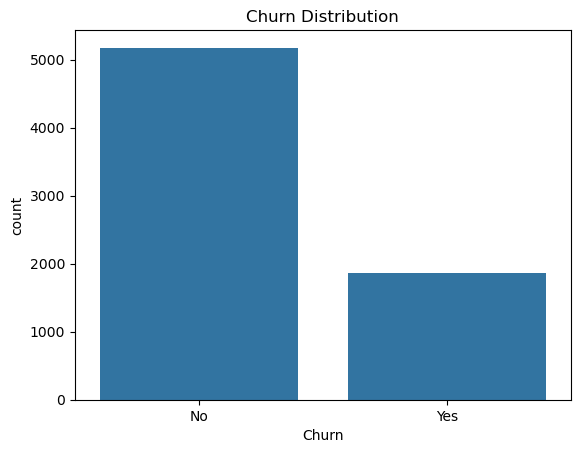

In [30]:
sns.countplot(x="Churn", data=df)
plt.title("Churn Distribution")
plt.show()


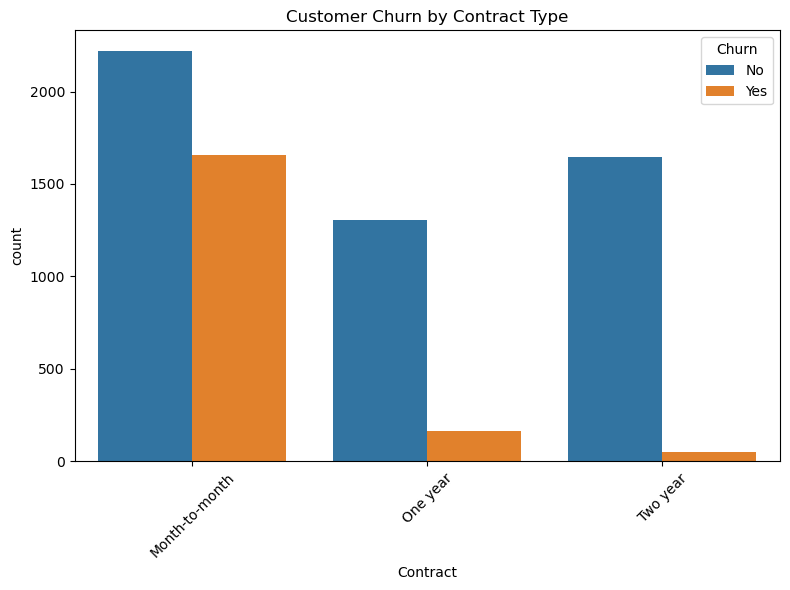

In [31]:
plt.figure(figsize=(8,6))
sns.countplot(x="Contract", hue="Churn", data=df)
plt.title("Customer Churn by Contract Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


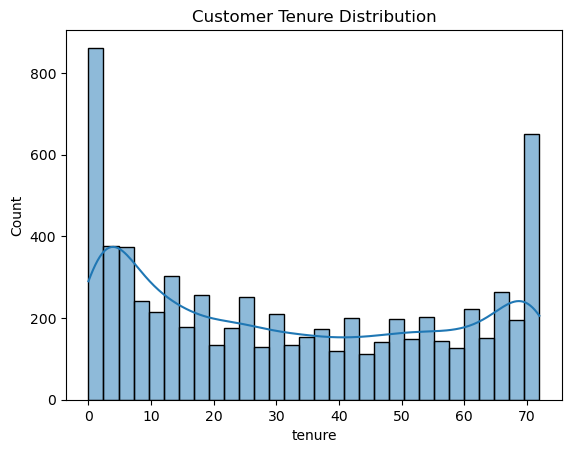

In [32]:
sns.histplot(df["tenure"], bins=30, kde=True)
plt.title("Customer Tenure Distribution")
plt.show()


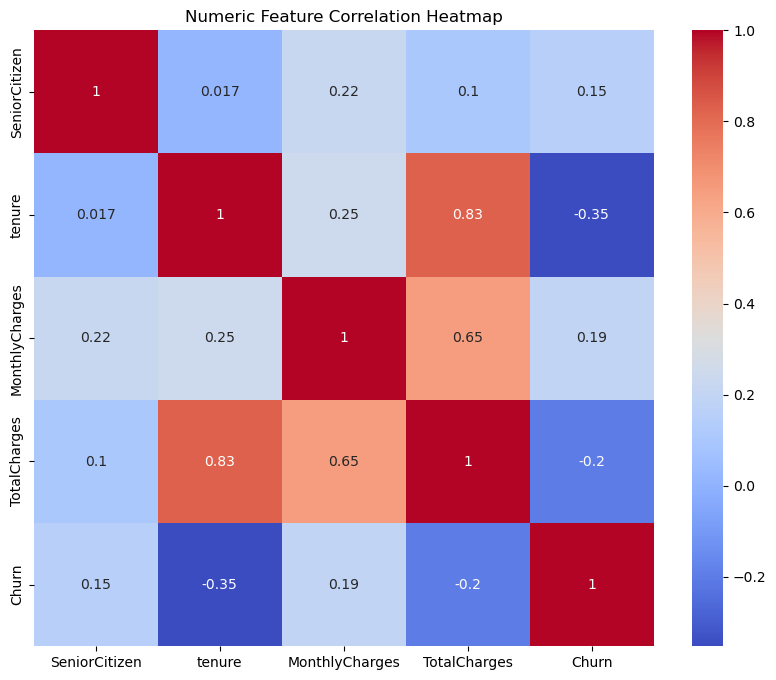

In [36]:
numeric_df = df.select_dtypes(include=np.number)

plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Numeric Feature Correlation Heatmap")
plt.show()

## 6. Save EDA Visualization


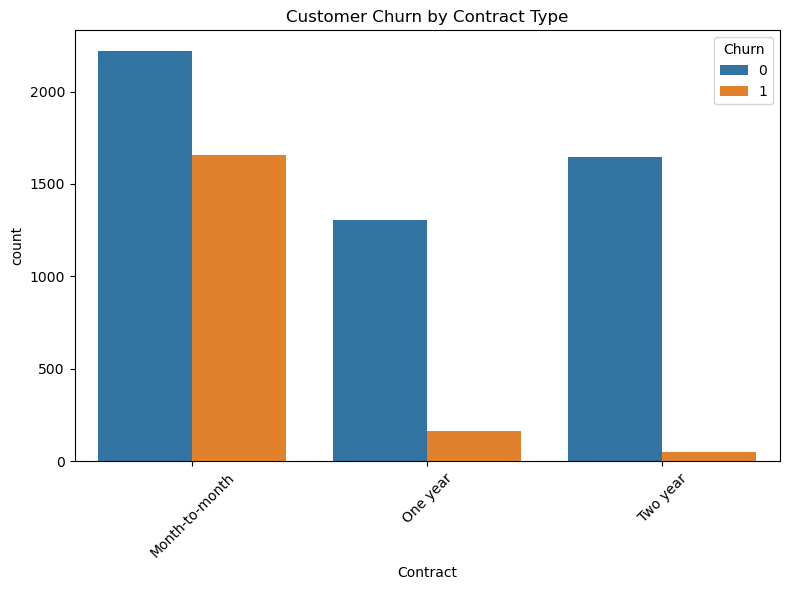

In [37]:
plt.figure(figsize=(8,6))
sns.countplot(x="Contract", hue="Churn", data=df)
plt.title("Customer Churn by Contract Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("../images/eda_visualizations.png")
plt.show()


## 7. Feature Encoding


In [38]:
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})


In [39]:
df_encoded = pd.get_dummies(df, drop_first=True)


## 8. Save Cleaned Dataset


In [41]:
df_encoded.to_csv("../data/processed/churn_cleaned.csv", index=False)


## 9. Feature Scaling


In [42]:
X = df_encoded.drop("Churn", axis=1)
y = df_encoded["Churn"]

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


## 10. Train-Test Split


In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


ValueError: Input y contains NaN.

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape


## Conclusion
In this project, we prepared a real-world customer churn dataset for machine learning by:

- Loading and validating raw data
- Cleaning missing and invalid values
- Performing exploratory data analysis
- Encoding categorical features
- Scaling numerical features
- Splitting the data into training and testing sets

The dataset is now fully prepared and suitable for machine learning modeling.
